In [1]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d positivepc/object-detection

 86% 65.0M/75.4M [00:01<00:00, 45.1MB/s]
100% 75.4M/75.4M [00:01<00:00, 49.7MB/s]


In [ ]:
!unzip object-detection.zip

In [22]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Rescaling,Dropout
from tensorflow.keras.models import Sequential

In [16]:
train = image_dataset_from_directory(
    '/content/training_set/Training_set',
    color_mode='rgb',
    image_size=(200, 200),
    batch_size=32,
    label_mode='categorical',
    subset='training',
    seed=42,
    validation_split=0.2,
    labels='inferred'
)

val = image_dataset_from_directory(
    '/content/training_set/Training_set',
    image_size=(200, 200),
    batch_size=32,
    color_mode='rgb',
    label_mode='categorical',
    subset='validation',
    seed=42,
    validation_split=0.2,
    labels='inferred'
)

Found 1486 files belonging to 2 classes.
Using 1189 files for training.
Found 1486 files belonging to 2 classes.
Using 297 files for validation.


In [74]:
model = Sequential()

In [75]:
model.add(Rescaling(1/255.,input_shape=(200,200,3)))
model.add(Conv2D(32,3,activation="relu"))
model.add(MaxPooling2D())#64
model.add(Conv2D(32,3,activation="relu"))
model.add(MaxPooling2D())#64

model.add(Flatten())
model.add(Dense(120,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(60,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [76]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [77]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 200, 200, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 73728)           

In [78]:
hist = model.fit(train,validation_data=val,epochs=3)

Epoch 1/3
38/38 [==============================] - 4s 56ms/step - loss: 0.8720 - accuracy: 0.5282 - val_loss: 0.6685 - val_accuracy: 0.6229
Epoch 2/3
38/38 [==============================] - 3s 62ms/step - loss: 0.5361 - accuracy: 0.7578 - val_loss: 0.4161 - val_accuracy: 0.7879
Epoch 3/3
38/38 [==============================] - 2s 48ms/step - loss: 0.3021 - accuracy: 0.8848 - val_loss: 0.4091 - val_accuracy: 0.8485


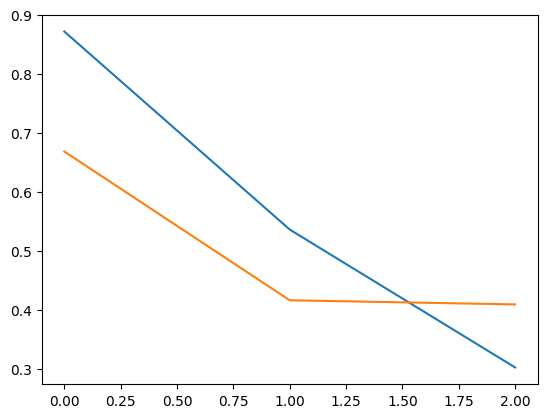

In [79]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [88]:
from PIL import Image
import cv2
import os
import numpy as np

In [85]:
imgs = []
classes = []
for f in os.listdir("/content/Training_set/Training_set/electric bus"):
  imgs.append(cv2.imread("/content/Training_set/Training_set/electric bus/"+f))
  classes.append(0)
for f in os.listdir("/content/Training_set/Training_set/electric car"):
  imgs.append(cv2.imread("/content/Training_set/Training_set/electric car/"+f))
  classes.append(1)


In [86]:
new_imgs = []
for img in imgs:
  new_imgs.append(cv2.resize(img,(200,200)))

In [89]:
imgs = np.array(new_imgs)

In [92]:
preds = model.predict(imgs)

47/47 [==============================] - 1s 11ms/step


In [100]:
f_preds = np.argmax(preds,axis=1)
classes = np.array(classes)

In [95]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(classes,f_preds)

0.9057873485868102